In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [16]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

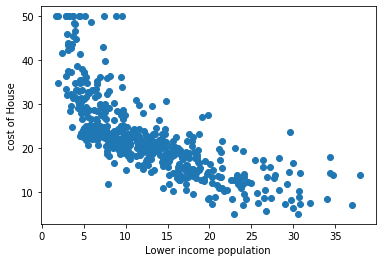

In [38]:
dataset=boston.data
data=dataset[:,12].reshape(-1,1)
target=boston.target.reshape(-1,1)
%matplotlib inline
plt.scatter(data,target)
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
reg=LinearRegression()
reg.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
pred=reg.predict(data)

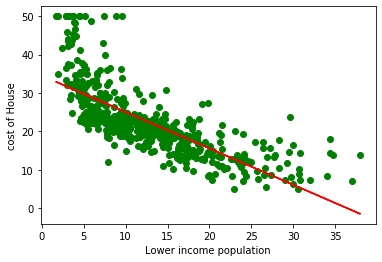

In [41]:
%matplotlib inline
plt.scatter(data,target,color="green")
plt.plot(data,pred,color="red")
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [42]:
#polynomial model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [43]:
model=make_pipeline(PolynomialFeatures(3),reg)

In [44]:
model.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
pred=model.predict(data)

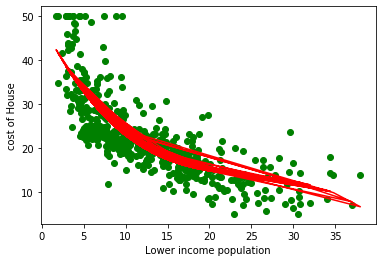

In [46]:
%matplotlib inline
plt.scatter(data,target,color="green")
plt.plot(data,pred,color="red")
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [48]:
#judge model
from sklearn.metrics import r2_score


In [49]:
r2_score(pred,target)

0.47989118102739436